In [4]:
import tiktoken
import pandas as pd

# Initialize the tokenizer
tokenizer = tiktoken.get_encoding("cl100k_base")

# Get the token count
tokens = tokenizer.encode(text)
token_count = len(tokens)

print(f"Token count: {token_count}")


def get_token_count(df):
    inp_count = []
    out_count = []
    ids = []

    for i, row in df.iterrows():
        inp = row["Context"]
        out = row["Decision"]

        inp_tokens = tokenizer.encode(inp)
        out_tokens = tokenizer.encode(out)

        ids.append(row["id"])
        inp_count.append(len(inp_tokens))
        out_count.append(len(out_tokens))


    return pd.DataFrame({"id": ids, "inp_count": inp_count, "out_count": out_count})


for i in ["train", "val", "test"]:
    # Load the data
    df = pd.read_json(f"data_{i}.jsonl", lines=True)

    # Get the token count
    df_token_count = get_token_count(df)

    # Save the token count
    df_token_count.to_csv(f"token_count_{i}.csv", index=False)

Token count: 6


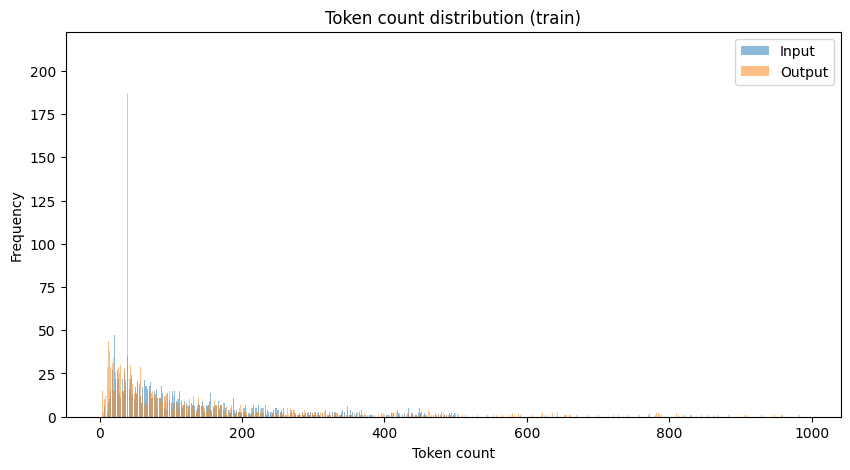

In [30]:
# Plot the histogram of the token count using log scale on y-axis

import matplotlib.pyplot as plt

i = 'train'    
df_token_count = pd.read_csv(f"token_count_{i}.csv")

# Data fame where both input and output token count is less than 500 
df_token_count = df_token_count[
    (df_token_count["inp_count"] < 1000) 
    &
      (df_token_count["out_count"] < 1000)
      ]

# Get the frequency of each token count and plot the histogram
inp_count_freq = df_token_count["inp_count"].value_counts().sort_index()
out_count_freq = df_token_count["out_count"].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(inp_count_freq.index, inp_count_freq.values, alpha=0.5, label="Input")
plt.bar(out_count_freq.index, out_count_freq.values, alpha=0.5, label="Output")
# plt.yscale("log")
plt.legend()
plt.xlabel("Token count")
plt.ylabel("Frequency")
plt.title(f"Token count distribution ({i})")
plt.savefig(f"token_count_{i}.png")
plt.show()


In [25]:
out_count_freq.argmax()

37